In [1]:
#libraries
import matplotlib
matplotlib.use('Agg')
#import torch
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score, jaccard_similarity_score, log_loss,recall_score, precision_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from PIL import Image
from utils.eval import *
import os
from itertools import chain

%matplotlib inline

In [2]:
experiments = '/scratch/sb3923/PathCNN_data/experiments/train_full_vgg16'
log_file = '/scratch/sb3923/PathCNN_data/logs/train_full_vgg16.log'
num_class = 3

class_names, class_codes, class_coding = get_class_coding(log_file)
class_coding
class_codes.sort()
class_coding
#class_names

{0: 'Solid_Tissue_Normal', 1: 'LUAD', 2: 'LUSC'}

AUC:
{0: 0.96233692569483831, 1: 0.8234524847428073, 2: 0.87883618971701871, 'precision': 0.71772917014526627, 'macro': 0.89074989938078564, 'micro': 0.80901041843802779, 'logloss': 0.8427471666690185, 'recall': 0.59279659584537636, 'jaccard': 0.61952861952861948, 'cohenskappa': 0.4087000951407731}
CU:
{0: 0.97939090019569475, 1: 0.8628135759960649, 2: 0.9093670389966686, 'macro': 0.97408764075430743, 'micro': 0.83169934640522869}
CL:
{0: 0.94328523862375135, 1: 0.78010709234188713, 2: 0.84382247522664977, 'macro': 0.79588303193535981, 'micro': 0.78329324169530357}
AUC:
{0: 0.97419171866137266, 1: 0.9031289353869999, 2: 0.93961737744121165, 'precision': 0.84589440989608577, 'macro': 0.94114152980435772, 'micro': 0.91186273509505833, 'logloss': 0.61703232741435254, 'recall': 0.79445627616359327, 'jaccard': 0.80134680134680136, 'cohenskappa': 0.69616104868913853}
CU:
{0: 0.98764781641493971, 1: 0.93163185633417922, 2: 0.96066468253968251, 'macro': 0.98370191803794149, 'micro': 0.92729063

/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AUC:
{0: 0.99466817923993189, 1: 0.95296909813038844, 2: 0.96378039059386211, 'precision': 0.88724954462659378, 'macro': 0.97181940229774277, 'micro': 0.96879570111893343, 'logloss': 0.38400470130895875, 'recall': 0.87597470829178148, 'jaccard': 0.87205387205387208, 'cohenskappa': 0.80631875203789194}
CU:
{0: 0.99896982183977701, 1: 0.96887065637065639, 2: 0.97941489876973742, 'macro': 0.99814814814814823, 'micro': 0.97642921193911647}
CL:
{0: 0.98891175125743036, 1: 0.93296062226543508, 2: 0.94497171891477327, 'macro': 0.94024045261669031, 'micro': 0.95973540566017057}
AUC:
{0: 0.99625638116846282, 1: 0.95161290322580638, 2: 0.97100438421681945, 'precision': 0.9135050269351539, 'macro': 0.9745372516653561, 'micro': 0.97222505640014045, 'logloss': 0.38506989232093258, 'recall': 0.90560048791756109, 'jaccard': 0.90572390572390571, 'cohenskappa': 0.85706674000103122}
CU:
{0: 0.99913005654632459, 1: 0.97058823529411775, 2: 0.98430890309886865, 'macro': 0.99824376536705306, 'micro': 0.9797

FileNotFoundError: [Errno 2] No such file or directory: 'valid_pred_label_avg_epoch_13.pth.npy'

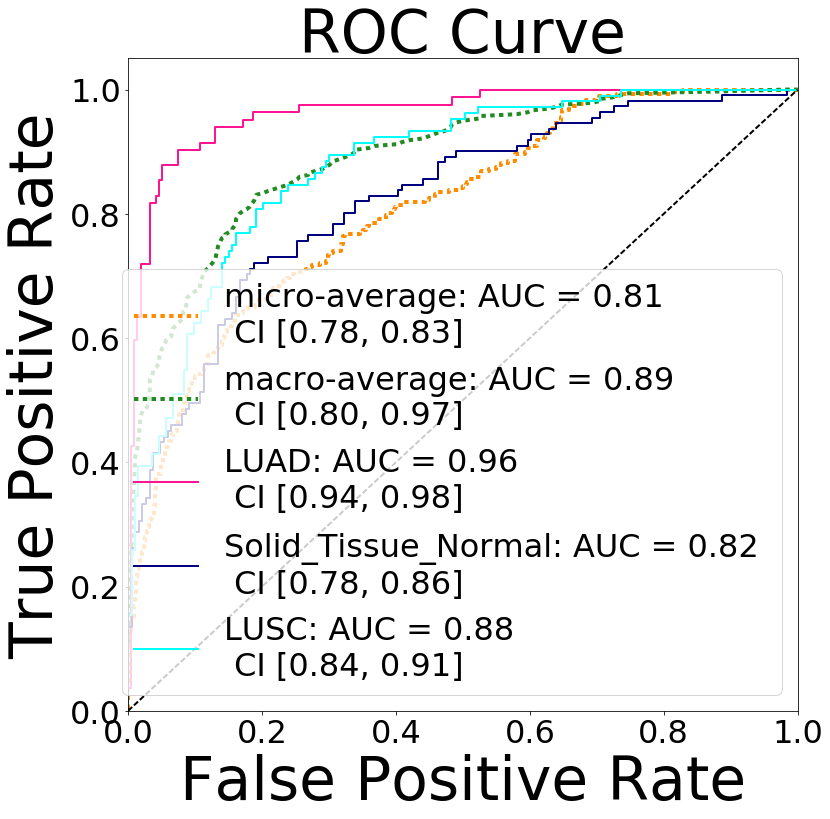

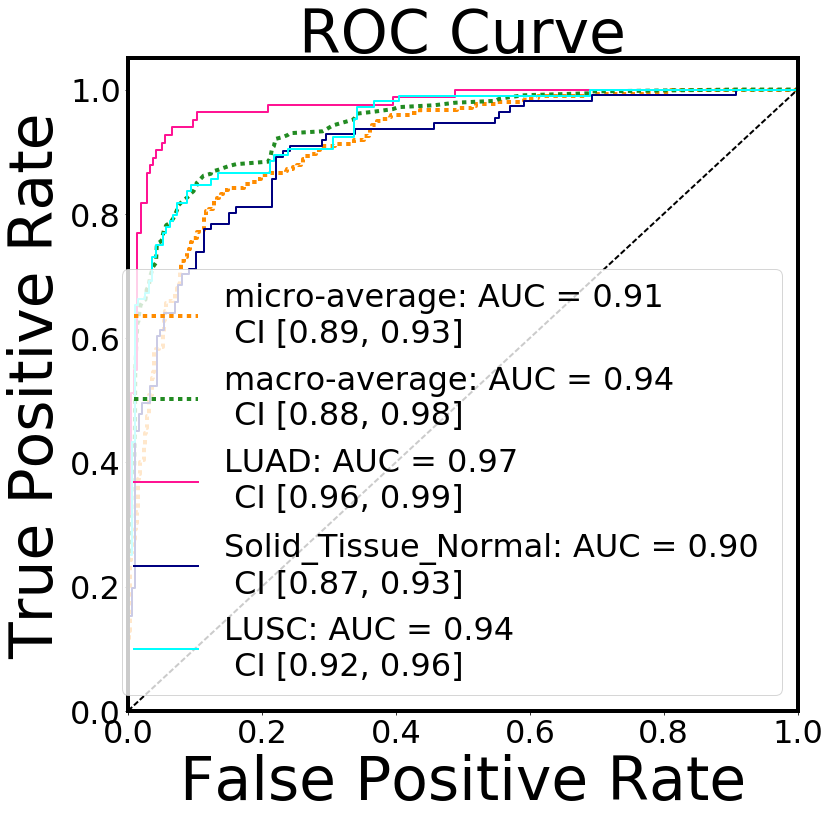

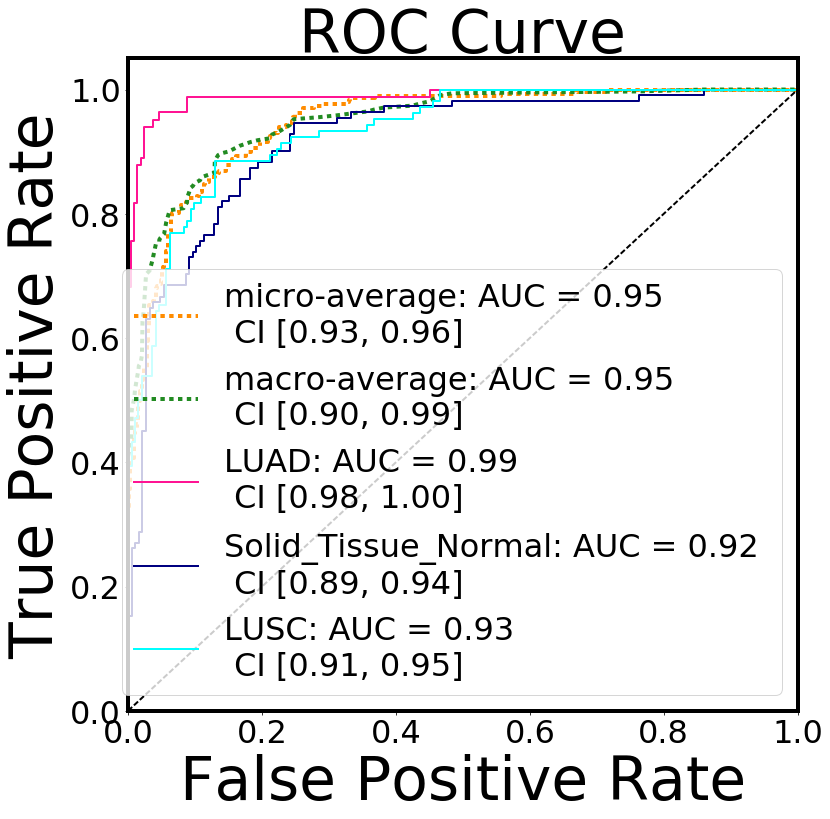

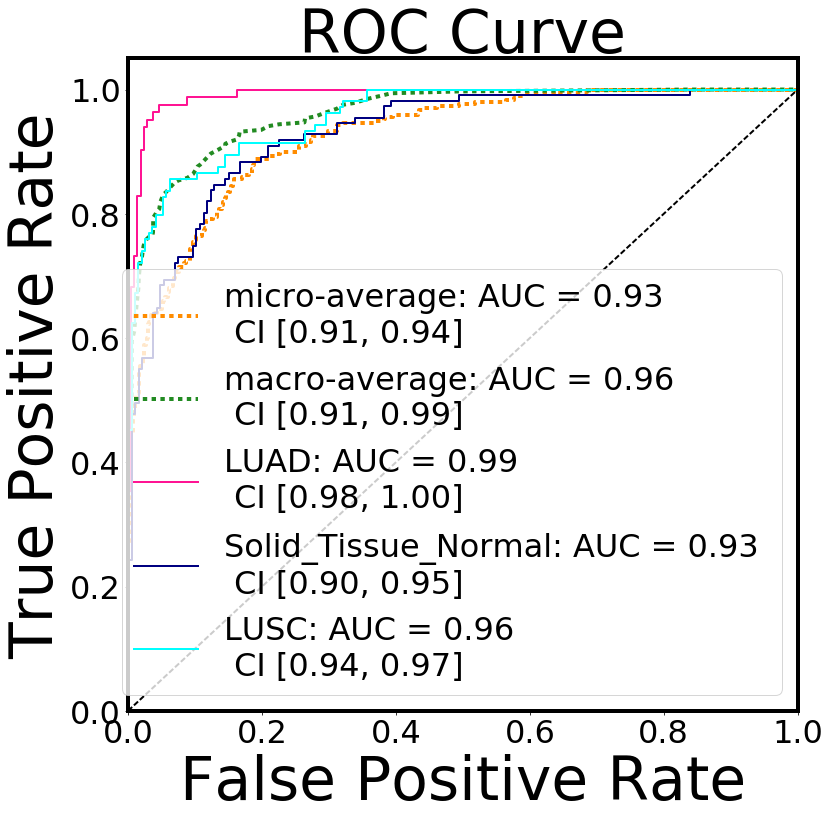

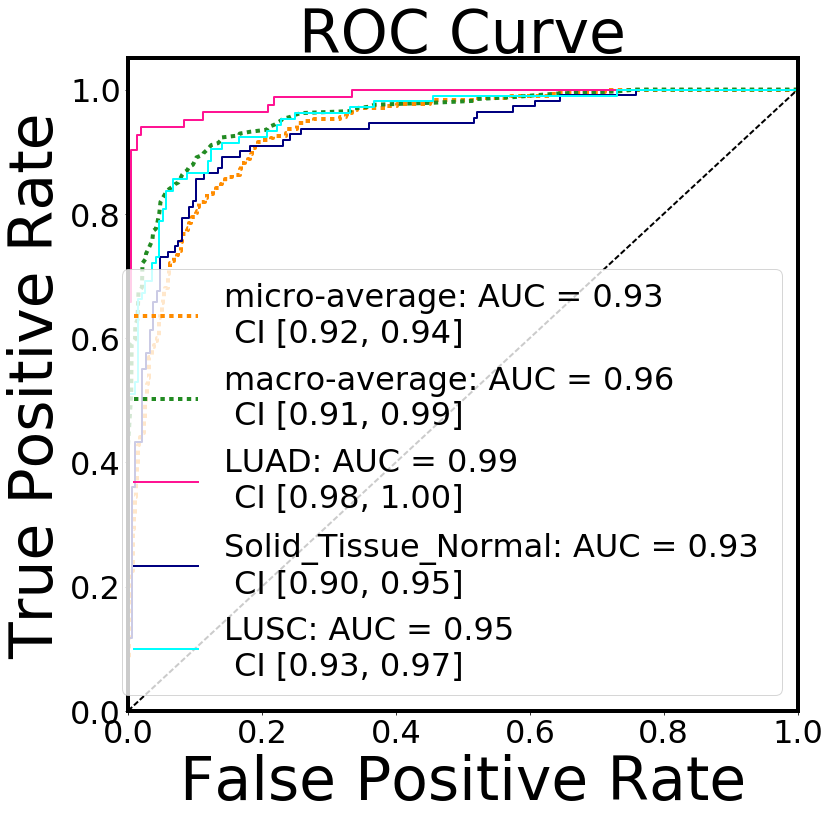

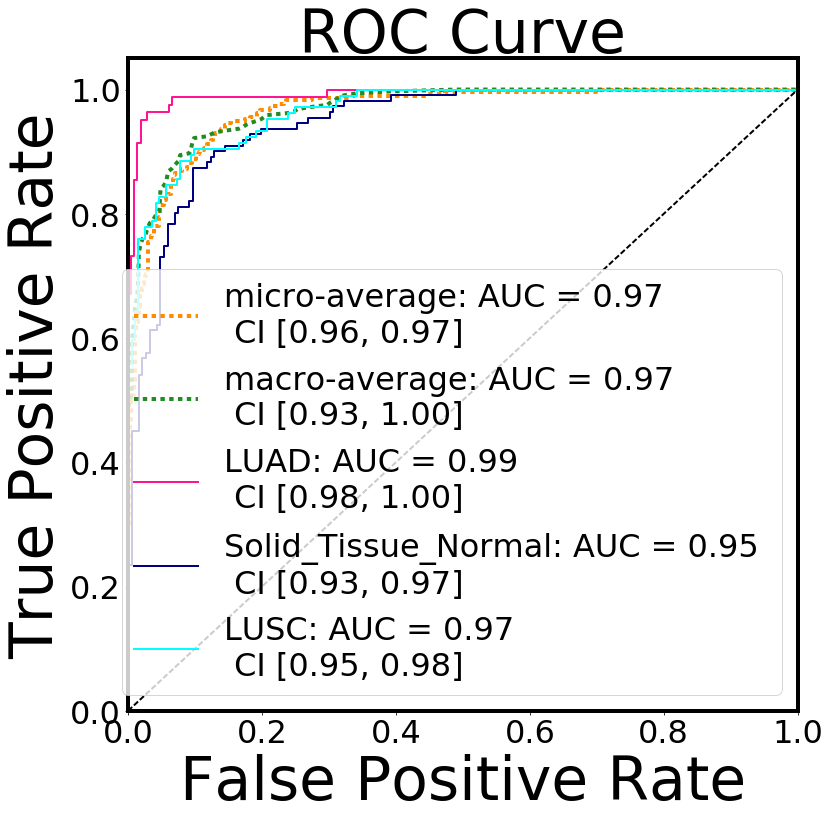

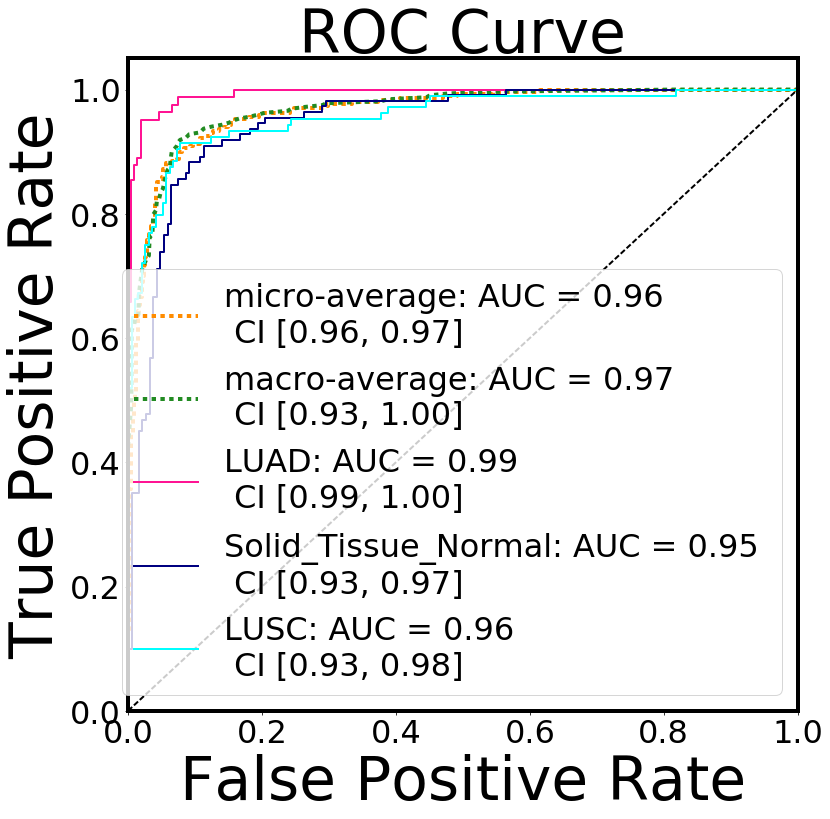

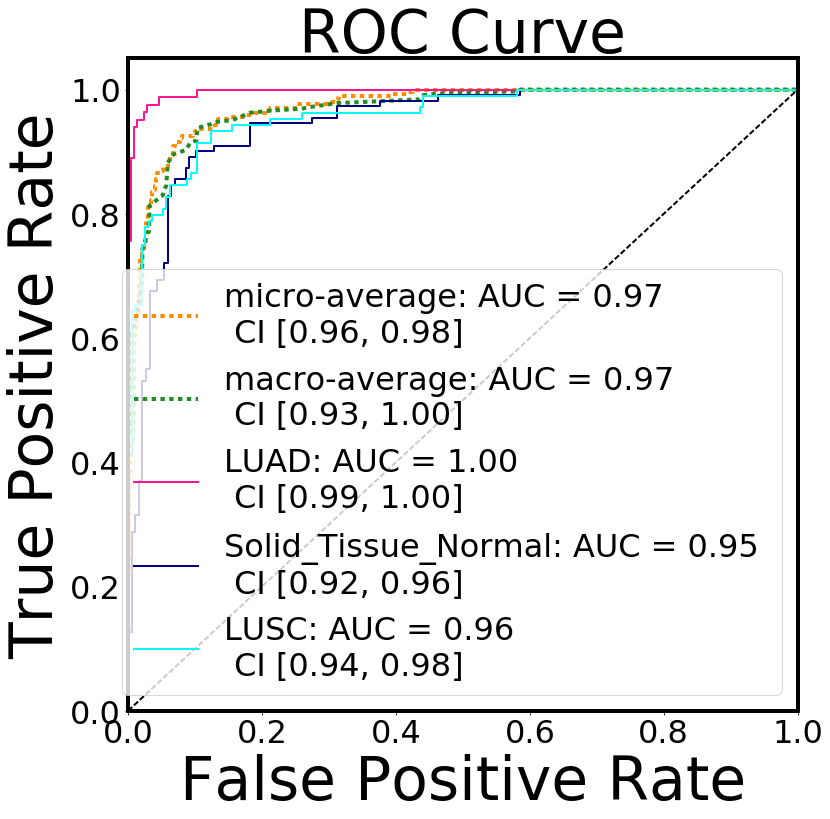

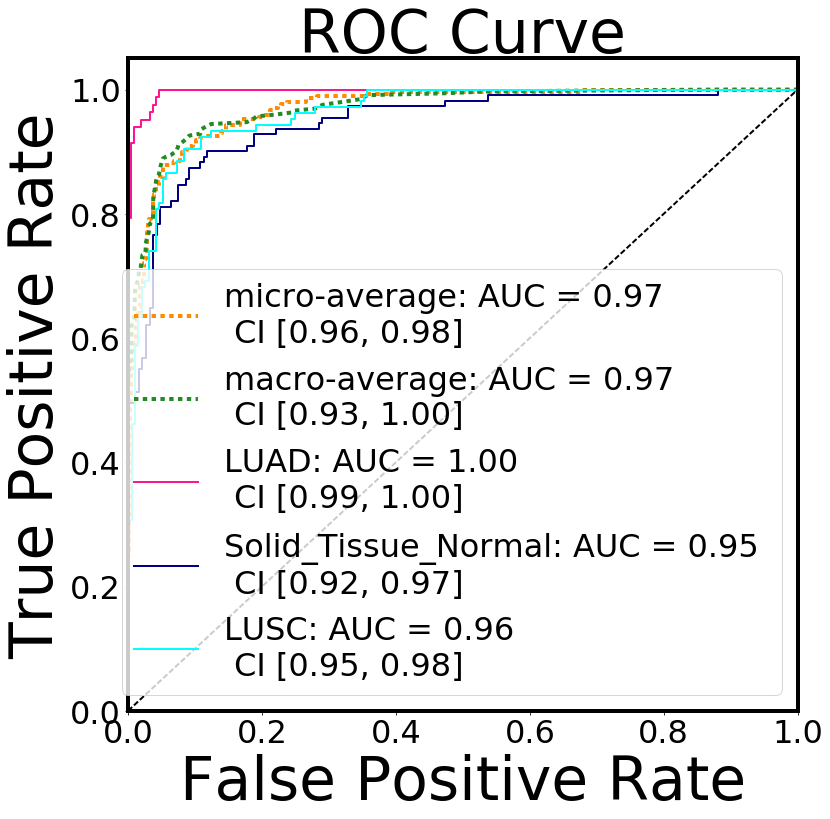

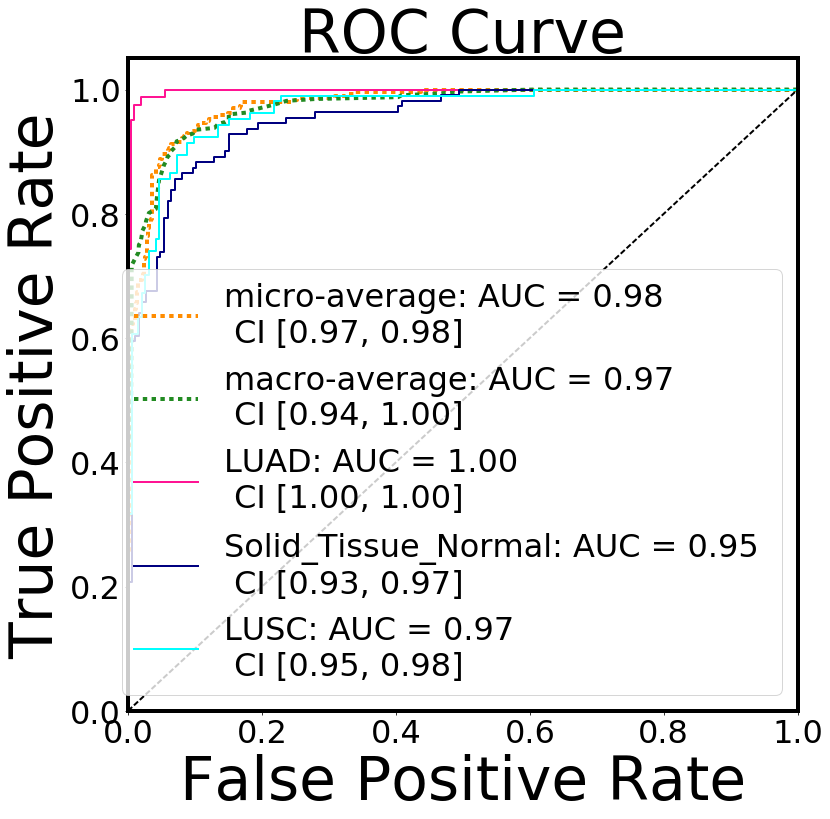

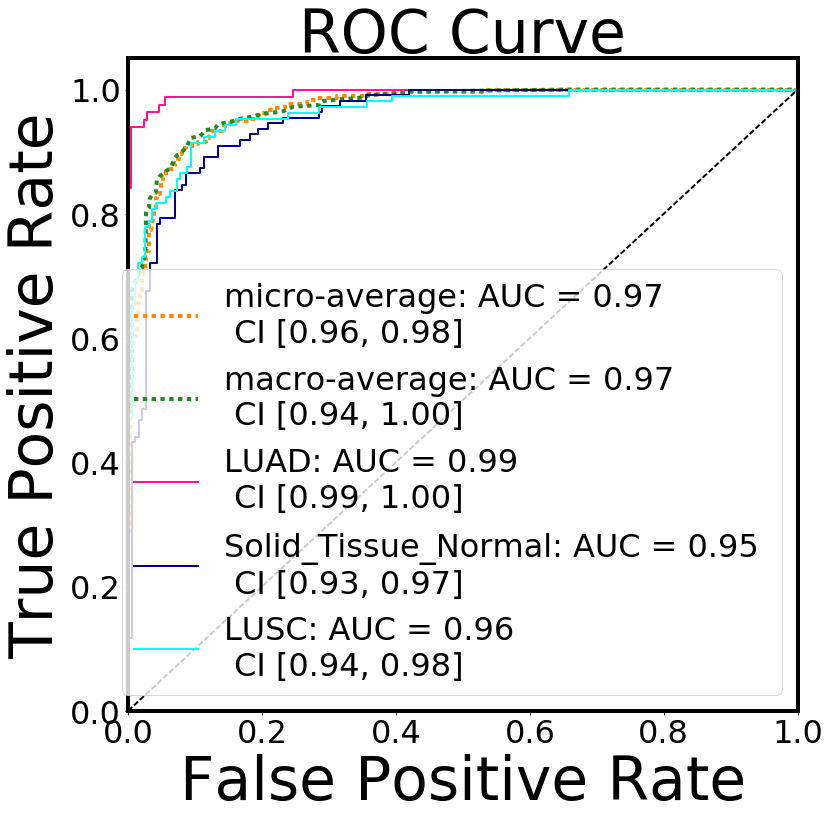

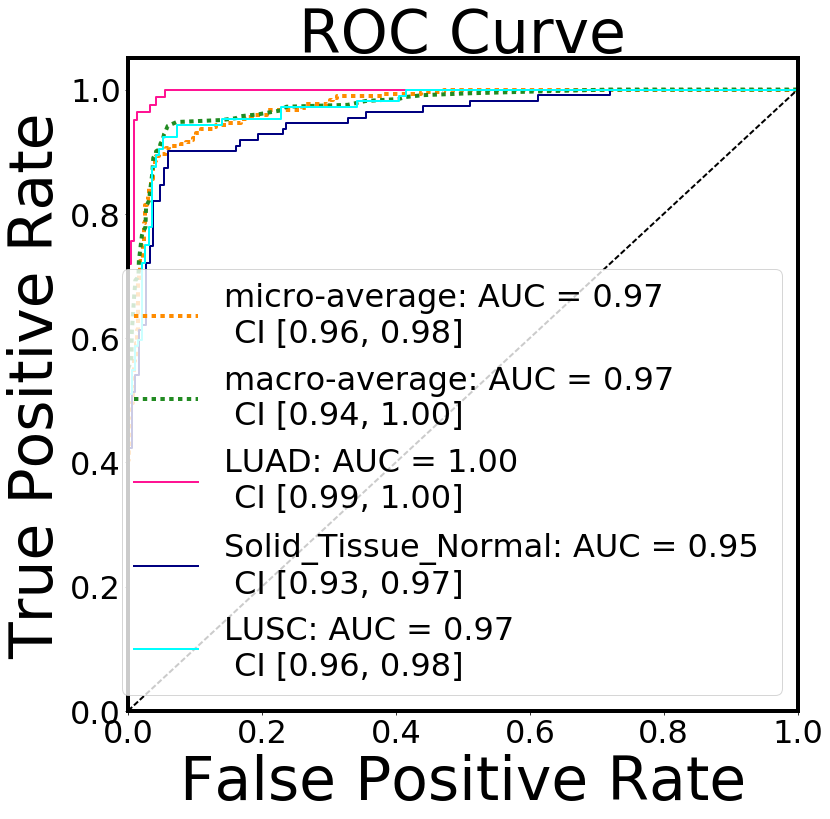

In [3]:
fpr={}
tpr={}
roc_auc={}
cu={}
cl={}

os.chdir(experiments + '/outputs/') #input
for n in range(1,26):
    pred_label = 'valid_pred_label_avg_epoch_'+str(n)+'.pth.npy'
    pd = np.load(open(pred_label, 'rb'))
    predictions = pd[:,:num_class] 
    labels = pd[:,num_class]
    fpr[n], tpr[n], roc_auc[n], cu[n], cl[n] = get_auc(predictions, labels, class_names, class_codes)



In [5]:
macro=[]
lusc = []
luad = []
normal = []
for n in range(1,13):
    macro.append(roc_auc[n]['macro'])
    normal.append(roc_auc[n][0])
    luad.append(roc_auc[n][1])
    lusc.append(roc_auc[n][2])

In [6]:
import pandas as pd
all_results = pd.DataFrame(
    {'macro': macro,
     'normal': normal,
     'luad': luad,
     'lusc': lusc
    })

export_csv = all_results.to_csv (r'/scratch/sb3923/PathCNN/test_valid_results/full_vgg16_valid.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [ ]:
epoch = list(range(1,25,1))

plt.scatter(epoch, macro, c= 'r', label='macro',s=1) # plotting t, b separately 
plt.xlabel('epoch', fontsize=18)
plt.ylabel('macro auc', fontsize=16)
plt.legend(loc='lower right')
plt.title('NEW MODEL: validation auc - full')
plt.show()